Defaulting to user installation because normal site-packages is not writeable
b'Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWit'
(1470, 35)
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely  

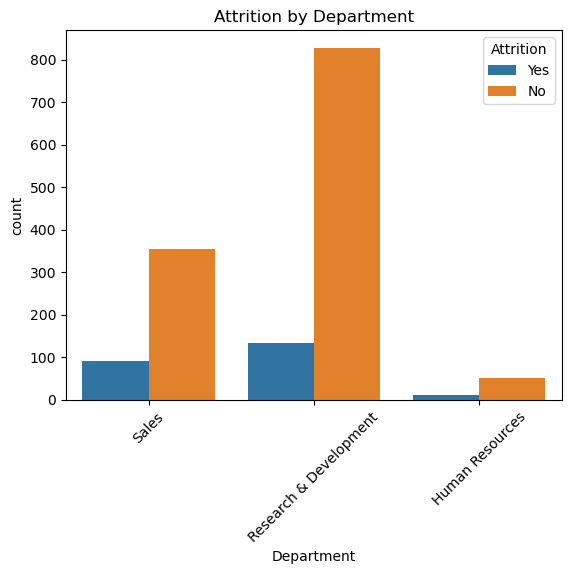

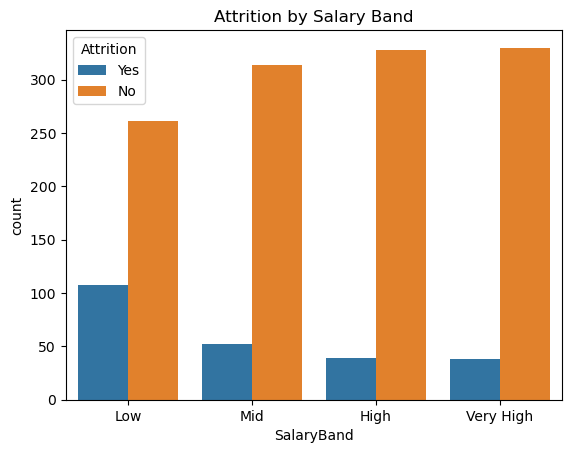

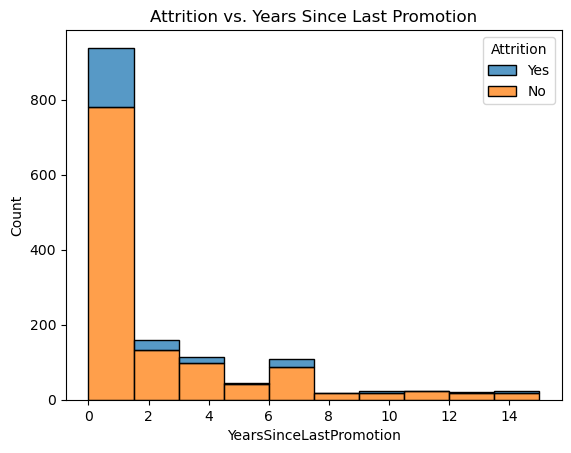

[[236  19]
 [ 33   6]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       255
           1       0.24      0.15      0.19        39

    accuracy                           0.82       294
   macro avg       0.56      0.54      0.54       294
weighted avg       0.79      0.82      0.81       294



In [6]:
#df = pd.read_csv("HR_EMPLOYEE_ATTRITIOON.csv", encoding='latin1')  # or try 'ISO-8859-1'

!pip install shap
# Step 1: Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
#import shap

with open("HR_EMPLOYEE_ATTRITION.csv", 'rb') as f:
    content = f.read(500)
    print(content)

# Step 2: Load and Explore Data
df = pd.read_csv("HR_EMPLOYEE_ATTRITION.csv", encoding='latin1')  # or try 'ISO-8859-1'
#df = pd.read_csv("HR_EMPLOYEE_ATTRITIOON.csv")  # Replace with your actual dataset path
print(df.shape)
print(df.head())
print(df['Attrition'].value_counts())

# Step 3: Exploratory Data Analysis (EDA)

# Department-wise Attrition
sns.countplot(data=df, x='Department', hue='Attrition')
plt.title("Attrition by Department")
plt.xticks(rotation=45)
plt.show()

# Salary Band Analysis
df['SalaryBand'] = pd.qcut(df['MonthlyIncome'], 4, labels=['Low', 'Mid', 'High', 'Very High'])
sns.countplot(data=df, x='SalaryBand', hue='Attrition')
plt.title("Attrition by Salary Band")
plt.show()

# Promotion vs. Attrition
sns.histplot(data=df, x='YearsSinceLastPromotion', hue='Attrition', multiple='stack', bins=10)
plt.title("Attrition vs. Years Since Last Promotion")
plt.show()

# Step 4: Data Preprocessing
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

X = df.drop(['Attrition'], axis=1)
y = df['Attrition']
##try
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Load data
df = pd.read_csv("HR_EMPLOYEE_ATTRITION.csv")

# Step 2: Encode target
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Step 3: Split features/target
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Step 4: One-hot encode categorical features
X = pd.get_dummies(X)

# Step 5: Handle missing values
X = X.fillna(0)

# Step 6: Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Align columns in test set to match training set (after one-hot encoding)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Step 8: Train model
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Step 9: Evaluate
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


